# Data Queryng Notebook

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import random

## Dataset information

In [2]:
path = '../Dataset/Dataset.tsv'

# Read the dataset
df = pd.read_csv(path, sep='\t')

df.head()

,Study ID,Patient ID,Sample ID,Age in years,Absolute Neutrophil Count (G/L),BM Blast (%),Chromosomal Status at TP53,CNACS Called Chr Arm Gain,CNACS Called Chr Arm Loss,CNACS Called Chr Arm Upd,...,Overall Survival (Months),Overall Survival Status,PB Blast (%),Platelet (G/L),Ringed Sideroblast (%),Number of Samples Per Patient,Sex,TMB (nonsynonymous),White Blood Cell Count (G/L),WHO 2016 Classification
0,mds_iwg_2022,E-H-100000,E-H-100000-T1-1-D1-1,57.0,4.65,3.0,normal,NaN,5q,NaN,...,69.830137,0:LIVING,0.0,406.0,NaN,1,Female,23.920896,7.50,MDS-del5q
1,mds_iwg_2022,E-H-100001,E-H-100001-T1-1-D1-1,56.0,2.88,2.0,normal,NaN,5q,NaN,...,34.290411,0:LIVING,0.0,364.0,NaN,1,Female,6.523881,7.21,MDS-del5q
2,mds_iwg_2022,E-H-100002,E-H-100002-T1-1-D1-1,72.0,0.49,15.0,cnloh,NaN,5q,17p,...,3.682192,1:DECEASED,0.0,35.0,NaN,1,Female,6.523881,2.60,MDS-EB2
3,mds_iwg_2022,E-H-100004,E-H-100004-T1-1-D1-1,40.0,1.56,3.0,normal,NaN,NaN,NaN,...,62.235616,0:LIVING,0.0,708.0,NaN,1,Female,4.349254,2.55,MDS/MPN-U
4,mds_iwg_2022,E-H-100005,E-H-100005-T1-1-D1-1,45.0,1.25,2.0,normal,NaN,NaN,NaN,...,67.758904,0:LIVING,0.0,141.0,NaN,1,Female,6.523881,2.31,MDS-MLD


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study ID                         3323 non-null   object 
 1   Patient ID                       3323 non-null   object 
 2   Sample ID                        3323 non-null   object 
 3   Age in years                     3303 non-null   float64
 4   Absolute Neutrophil Count (G/L)  3130 non-null   float64
 5   BM Blast (%)                     3214 non-null   float64
 6   Chromosomal Status at TP53       3323 non-null   object 
 7   CNACS Called Chr Arm Gain        159 non-null    object 
 8   CNACS Called Chr Arm Loss        668 non-null    object 
 9   CNACS Called Chr Arm Upd         359 non-null    object 
 10  CNACS Called Gene Gain           150 non-null    object 
 11  CNACS Called Gene Loss           647 non-null    object 
 12  CNACS Called Gene Up

In [4]:
#drop column Study ID
df = df.drop(['Study ID'], axis=1)
df = df.drop(['Sample ID'], axis=1)
df = df.drop(['Number of Samples Per Patient'], axis=1)

In [5]:
df

,Patient ID,Age in years,Absolute Neutrophil Count (G/L),BM Blast (%),Chromosomal Status at TP53,CNACS Called Chr Arm Gain,CNACS Called Chr Arm Loss,CNACS Called Chr Arm Upd,CNACS Called Gene Gain,CNACS Called Gene Loss,...,Mutation Count,Overall Survival (Months),Overall Survival Status,PB Blast (%),Platelet (G/L),Ringed Sideroblast (%),Sex,TMB (nonsynonymous),White Blood Cell Count (G/L),WHO 2016 Classification
0,E-H-100000,57.0,4.65,3.0,normal,NaN,5q,NaN,NaN,"CSF1R,CSNK1A1,IRF1,RAD50",...,11.0,69.830137,0:LIVING,0.0,406.0,NaN,Female,23.920896,7.50,MDS-del5q
1,E-H-100001,56.0,2.88,2.0,normal,NaN,5q,NaN,NaN,"CSF1R,CSNK1A1,IRF1,RAD50",...,3.0,34.290411,0:LIVING,0.0,364.0,NaN,Female,6.523881,7.21,MDS-del5q
2,E-H-100002,72.0,0.49,15.0,cnloh,NaN,5q,17p,NaN,"CSF1R,CSNK1A1,IRF1,RAD50",...,3.0,3.682192,1:DECEASED,0.0,35.0,NaN,Female,6.523881,2.60,MDS-EB2
3,E-H-100004,40.0,1.56,3.0,normal,NaN,NaN,NaN,NaN,NaN,...,2.0,62.235616,0:LIVING,0.0,708.0,NaN,Female,4.349254,2.55,MDS/MPN-U
4,E-H-100005,45.0,1.25,2.0,normal,NaN,NaN,NaN,NaN,NaN,...,3.0,67.758904,0:LIVING,0.0,141.0,NaN,Female,6.523881,2.31,MDS-MLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,I-H-132725,69.0,0.60,12.0,normal,NaN,NaN,NaN,NaN,NaN,...,6.0,51.484932,0:LIVING,0.0,61.0,0.0,Male,13.047761,2.00,MDS-EB2
3319,I-H-132726,60.0,0.50,15.0,normal,NaN,NaN,NaN,NaN,NaN,...,2.0,27.353425,0:LIVING,0.0,383.0,0.0,Female,4.349254,1.90,MDS-EB2
3320,I-H-132727,58.0,1.00,5.0,normal,NaN,NaN,NaN,NaN,NaN,...,3.0,6.936986,0:LIVING,0.0,44.0,0.0,Male,6.523881,2.30,MDS-EB1
3321,I-H-132728,79.0,40.10,2.0,normal,NaN,NaN,NaN,NaN,NaN,...,6.0,15.419178,1:DECEASED,0.0,14.0,0.0,Male,13.047761,44.90,MDS/MPN-U


In [6]:
col_names = list(df.columns.values)
for col in col_names:
    print(col+'\t')
    n = len(df[col].unique())
    print(df[col].unique())
    print('total of uniques: ', n)
    print('------------------------')

Patient ID	
['E-H-100000' 'E-H-100001' 'E-H-100002' ... 'I-H-132727' 'I-H-132728'
 'I-H-132729']
total of uniques:  3323
------------------------
Age in years 	
[ 57.  56.  72.  40.  45.  54.  53.  60.  59.  33.  21.  63.  58.  67.
  66.  61.  64.  29.  83.  78.  73.  79.  70.  80.  52.  95.  77.  81.
  65.  76.  82.  50.  88.  87.  74.  62.  68.  75.  48.  55.  69.  46.
  51.  71.  85.  43.  49.  92.  84.  44.  34.  37.  36.  47.  42.  23.
  19.  35.  22.  91.  28.  41.  31.  89.  30.  86.  39.  38.  26.  20.
  18.  16.  nan  32. 100.  93.  94.  90.  27.  99.  96.  97.  98.  24.
  25.  12.]
total of uniques:  86
------------------------
Absolute Neutrophil Count (G/L)	
[ 4.65  2.88  0.49 ... 42.2  12.2  40.1 ]
total of uniques:  1027
------------------------
BM Blast (%)	
[ 3.   2.  15.   1.   9.  16.   0.  17.  13.  14.  19.  48.   7.  18.
  6.   8.   5.   4.  10.  11.  12.   1.4 11.5 25.  21.  29.  22.  45.
 80.  24.  90.  35.  37.  55.  27.  33.  28.  60.  38.  50.   0.5  2.5
  5.5

## DP hancrafted method (COIN TOSS)

### Random balanced coin toss

In [7]:
for i in range(0, len(df)):
  toss_1 = random.random()    #toss<0.5: Head 
                                  #toss>=0.5: Tail
  if (toss_1 >= 0.5):
    df.loc[i, 'random FLT3'] = df.loc[i, 'FLT3 ITD']

  else:
    toss_2 = random.random()  #toss<0.5: Head 
                                  #toss>=0.5: Tail
    if (toss_2 >= 0.5):
      df.loc[i, 'random FLT3'] = True
    else:
      df.loc[i, 'random FLT3'] = False

False    3297
True       26
Name: FLT3 ITD, dtype: int64


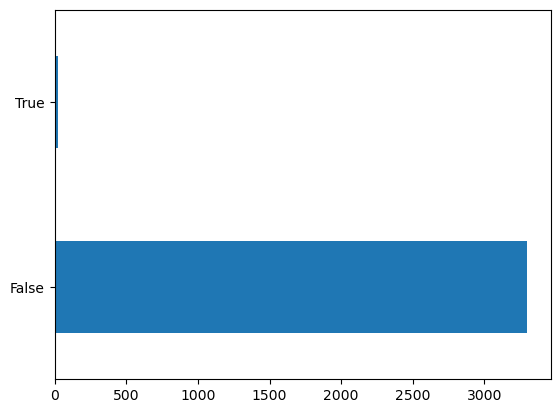

In [8]:
# True Histogram of FLT3 ITD
df['FLT3 ITD'].value_counts().plot(kind='barh')
print(df['FLT3 ITD'].value_counts())

False    2498
True      825
Name: random FLT3, dtype: int64


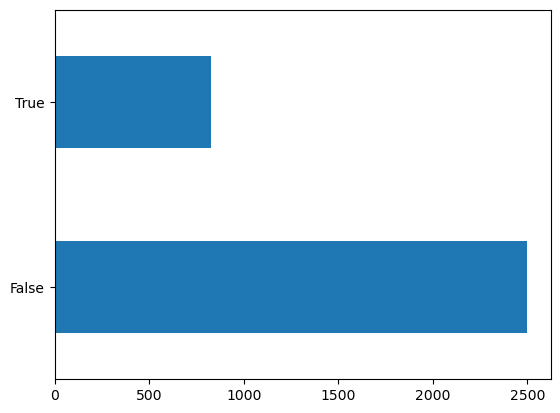

In [9]:
# Randomized Histogram of FLT3 ITD
df['random FLT3'].value_counts().plot(kind='barh')
print(df['random FLT3'].value_counts())

## Models for Classification

### Data Preprocessing

In [10]:
# Preparation of data for classification
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
random.seed(0)

# Remove rows with missing values in the column Overall Survival Status
df = df.dropna(subset=['Overall Survival Status'])

# Prepare Labels
y = df['Overall Survival Status'].values
y = np.where(y == '0:LIVING', 0, y)
y = np.where(y == '1:DECEASED', 1, y)

# Encode the labels for the classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(y_encoded)
print(y_encoded.shape)

# Change values of the Sex column to 0 and 1 to be able to use it for the classification
sex_mapping = {'Male' : 0.0, 'Female' : 1.0}
df['Sex'] = df['Sex'].map(sex_mapping)

# select the columns Sex, Age in years, Absolute Neutrophil Count (G/L), BM Blast (%), Hemoglobin (g/dL), Monocyte Count (G/L), Mutation Count, PB Blast (%), Platelet Count (G/L), Ringed Sideroblast (%), White Blood Cell Count (G/L)

X = df['Sex'].values
X = np.vstack((X, (df['Absolute Neutrophil Count (G/L)']).values))
X = np.vstack((X, (df['BM Blast (%)']).values))
X = np.vstack((X, (df['Hemoglobin (g/dL)']).values))
X = np.vstack((X, (df['Monocyte Count (G/L)']).values))
X = np.vstack((X, (df['Mutation Count']).values))
X = np.vstack((X, (df['PB Blast (%)']).values))
X = np.vstack((X, (df['Platelet (G/L)']).values))
X = np.vstack((X, (df['Ringed Sideroblast (%)']).values))
X = np.vstack((X, (df['White Blood Cell Count (G/L)']).values))


X = X.T
print(X)
print(X.shape)


# Fill nan values with mean
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X = imp.transform(X)
print(X)
print(X.shape)

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

[0 0 1 ... 0 1 0]
(3173,)
[[  1.     4.65   3.   ... 406.      nan   7.5 ]
 [  1.     2.88   2.   ... 364.      nan   7.21]
 [  1.     0.49  15.   ...  35.      nan   2.6 ]
 ...
 [  0.     1.     5.   ...  44.     0.     2.3 ]
 [  0.    40.1    2.   ...  14.     0.    44.9 ]
 [  0.     0.5   20.   ... 147.     0.     1.3 ]]
(3173, 10)
[[  1.           4.65         3.         ... 406.          14.01451876
    7.5       ]
 [  1.           2.88         2.         ... 364.          14.01451876
    7.21      ]
 [  1.           0.49        15.         ...  35.          14.01451876
    2.6       ]
 ...
 [  0.           1.           5.         ...  44.           0.
    2.3       ]
 [  0.          40.1          2.         ...  14.           0.
   44.9       ]
 [  0.           0.5         20.         ... 147.           0.
    1.3       ]]
(3173, 10)


/tmp/ipykernel_14876/1299859939.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map(sex_mapping)


### Normal Classification Model (Logistic Regression)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Definition of the model
model = LogisticRegression(random_state=0, max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Accuracy of the model
accuracy_model = accuracy_score(y_test, y_pred)
print("Accuracy in the non Privacy Model: %.2f%% \n" % (accuracy_model* 100.0))

accuracy_model_score = []
accuracy_model_score.append(accuracy_model)

Accuracy in the non Privacy Model: 64.25% 



### Model with epsilon Differential Privacy (Logistic Regression)

In [12]:
# ML models with differential privacy built-it
from diffprivlib.models import LogisticRegression as LogisticRegressionDP
from sklearn.metrics import accuracy_score

# Anonimyzed model definition
privacy_model = LogisticRegressionDP(epsilon=0.1, data_norm=5, random_state=0)

# Train the model
privacy_model.fit(X_train, y_train)

# Test the model
y_pred = privacy_model.predict(X_test)

# Accuracy
print("Accuracy in the Privacy Model: %.2f%%" % (privacy_model.score(X_test, y_test) * 100.0))

Accuracy in the Privacy Model: 51.34%


### Logistic Regression Classification Results

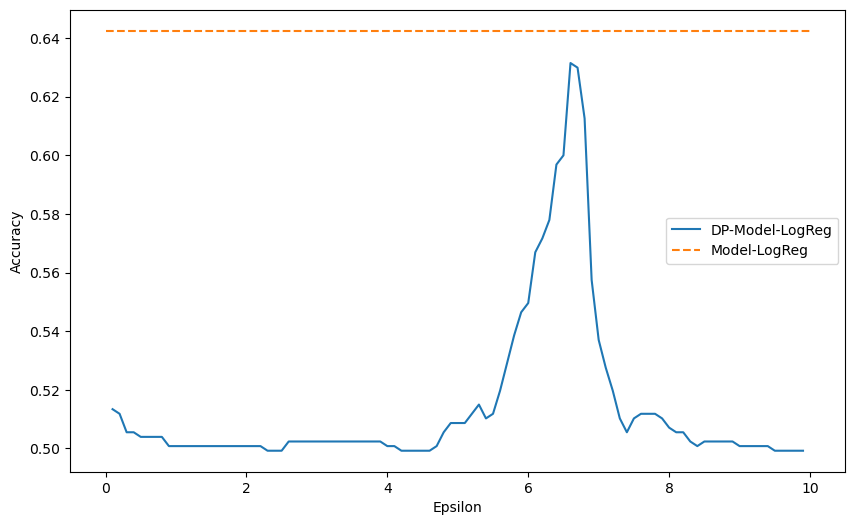

In [13]:
accuracy_dp_score = []
for epsilon in np.arange(0.1, 10, 0.1):
    dp_model = LogisticRegressionDP(epsilon=epsilon, data_norm=5, random_state=0, max_iter=1000)
    dp_model.fit(X_train, y_train)
    accuracy_dp_score.append(dp_model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(np.arange(0.1, 10, 0.1), accuracy_dp_score, label='DP-Model-LogReg')
plt.plot([0, 10], [accuracy_model_score[0], accuracy_model_score[0]], label='Model-LogReg', linestyle='--')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Normal Classification Model & DP Model (Gaussian Naive Bayes)

In [14]:
from diffprivlib.models import GaussianNB as dp_GaussianNB
from sklearn.naive_bayes import GaussianNB as GaussianNB_sklearn

model_NB = GaussianNB_sklearn()
model_NB.fit(X_train, y_train)

private_model_NB = dp_GaussianNB()
private_model_NB.fit(X_train, y_train)

model_NB_accuracy = model_NB.score(X_test, y_test)
model_NB_accuracy_score = []
model_NB_accuracy_score.append(model_NB_accuracy)

private_model_NB_accuracy = private_model_NB.score(X_test, y_test)

print("Non-private test accuracy: %.2f%%" % (model_NB_accuracy * 100))
print("Private test accuracy: %.2f%%" % (private_model_NB_accuracy * 100))

Non-private test accuracy: 53.39%
Private test accuracy: 50.39%


/home/kdf/.local/lib/python3.10/site-packages/diffprivlib/models/naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


### Gaussian Naive Bayes Classification Results

/home/kdf/.local/lib/python3.10/site-packages/diffprivlib/models/naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
/home/kdf/.local/lib/python3.10/site-packages/diffprivlib/models/naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
/home/kdf/.local/lib/python3.10/site-packages/diffprivlib/models/naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been spec

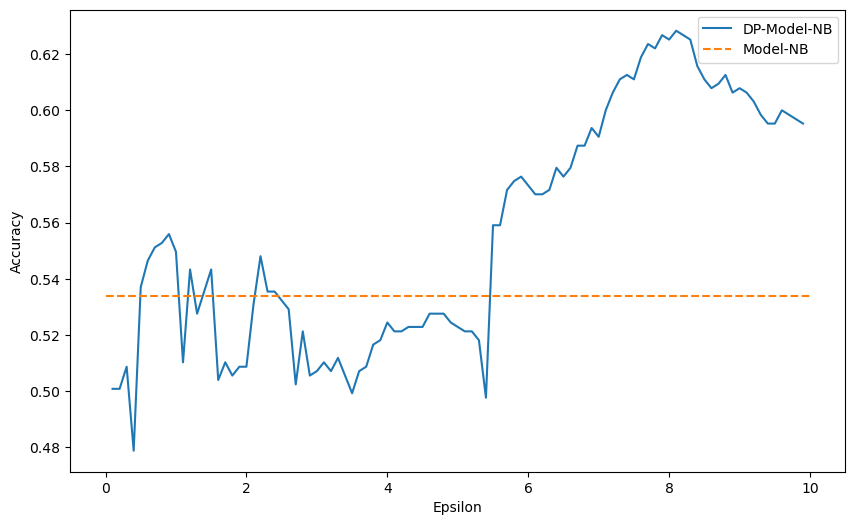

In [15]:
accuracy_dp_score_NB = []
for epsilon in np.arange(0.1, 10, 0.1):
    dp_model = dp_GaussianNB(epsilon=epsilon, random_state=0)
    dp_model.fit(X_train, y_train)
    accuracy_dp_score_NB.append(dp_model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(np.arange(0.1, 10, 0.1), accuracy_dp_score_NB, label='DP-Model-NB')
plt.plot([0,10], [model_NB_accuracy_score[0], model_NB_accuracy_score[0]], label='Model-NB', linestyle='--')
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Data Clustering

### Data Preparation, initial visualization and Normalization

In [16]:
data = df[['Leukemia Free Survival (Months)', 'Mutation Count', 'IPSS-R']]

# substitute missing values with mean
data['Leukemia Free Survival (Months)'] = data['Leukemia Free Survival (Months)'].fillna(data['Leukemia Free Survival (Months)'].mean())
data['Mutation Count'] = data['Mutation Count'].fillna(data['Mutation Count'].mean())

data.head()

/tmp/ipykernel_14876/3762336857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Leukemia Free Survival (Months)'] = data['Leukemia Free Survival (Months)'].fillna(data['Leukemia Free Survival (Months)'].mean())
/tmp/ipykernel_14876/3762336857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Mutation Count'] = data['Mutation Count'].fillna(data['Mutation Count'].mean())


,Leukemia Free Survival (Months),Mutation Count,IPSS-R
0,69.830137,11.0,Low
1,34.290411,3.0,Low
2,2.695890,3.0,Very-High
3,62.235616,2.0,Int
4,55.758904,3.0,Very-Low


<AxesSubplot:xlabel='Leukemia Free Survival (Months)', ylabel='Mutation Count'>

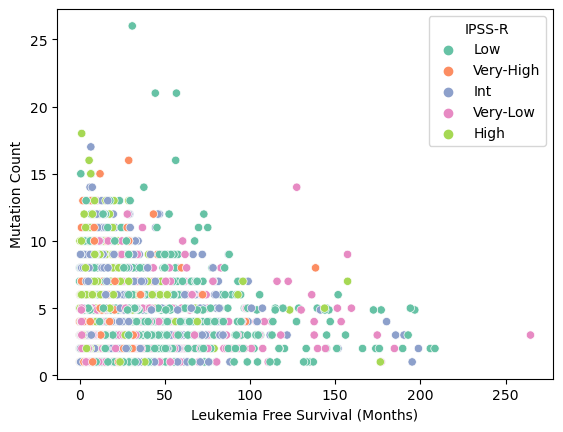

In [17]:
# Data Visualization
sns.scatterplot(data = data, y = 'Mutation Count', x = 'Leukemia Free Survival (Months)', hue = 'IPSS-R', palette = 'Set2')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Split data into training and test set
X_train = data[['Mutation Count', 'Leukemia Free Survival (Months)']]

# Normalize data
X_train_norm = preprocessing.normalize(X_train)

# set bounds variable (useful for avoiding information Leakage)
bounds = (X_train_norm.min(axis=0), X_train_norm.max(axis=0))


### Normal Clustering

In [19]:
# Naive Clstering
from sklearn.cluster import KMeans

kmeans = KMeans(init="k-means++", n_clusters = 2, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [20]:
# Performance evaluation
from sklearn.metrics import silhouette_score

silhouette_score_model = silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')
print("Silhouette score of Normal Clustering: %0.3f" %  silhouette_score_model)

Silhouette score of Normal Clustering: 0.730


In [21]:
K = range(2, 21)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric = 'euclidean'))

print('Done!')

Done!


### DP Clustering

In [22]:
from diffprivlib.models.k_means import KMeans as dpKMeans

# Create a KMeans model with differential privacy
kmeans_dp = dpKMeans(n_clusters = 2, random_state = 0, epsilon=0.001, bounds = bounds)
kmeans_dp.fit(X_train_norm)

KMeans(accountant=BudgetAccountant(spent_budget=[(0.1, 0), (0.1, 0), (0.2, 0), (0.30000000000000004, 0), (0.4, 0), ...]),
       bounds=(array([0.0051249 , 0.00410955]),
               array([0.99999156, 0.99998687])),
       epsilon=0.001, n_clusters=2, random_state=0)

In [23]:
from sklearn.metrics import silhouette_score

# Bounds parameter specify the interval in whihc the values are, so that the model can correct himself accordingly

# Performance evaluation
silhouette_score_dp = silhouette_score(X_train_norm, kmeans_dp.labels_, metric='euclidean')
print("Silhouette score of DP Clustering: %0.3f" % silhouette_score_dp)

Silhouette score of DP Clustering: 0.722


In [24]:
K = range(2, 21)
fits_dp = []
score_dp = []

for k in K:
    # train the model for current value of k on training data
    model = dpKMeans(epsilon=0.001,n_clusters = k, random_state = 0, bounds=bounds).fit(X_train_norm)
    
    # append the model to fits
    fits_dp.append(model)
    
    # Append the silhouette score to scores
    score_dp.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

print('Done!')

Done!


### Comparison & Results

<AxesSubplot:xlabel='Leukemia Free Survival (Months)', ylabel='Mutation Count'>

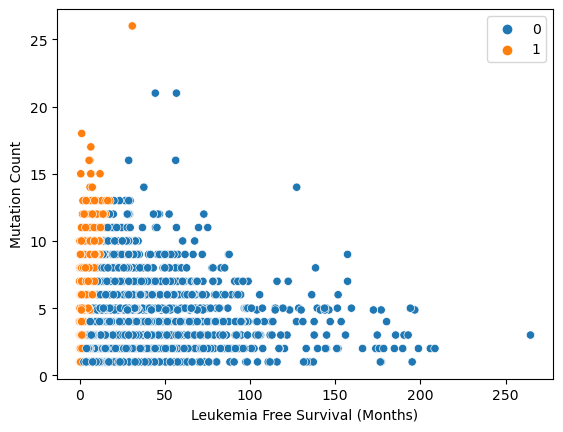

In [25]:
sns.scatterplot(data = X_train, y = 'Mutation Count', x = 'Leukemia Free Survival (Months)', hue = fits[0].labels_)

<AxesSubplot:xlabel='Leukemia Free Survival (Months)', ylabel='Mutation Count'>

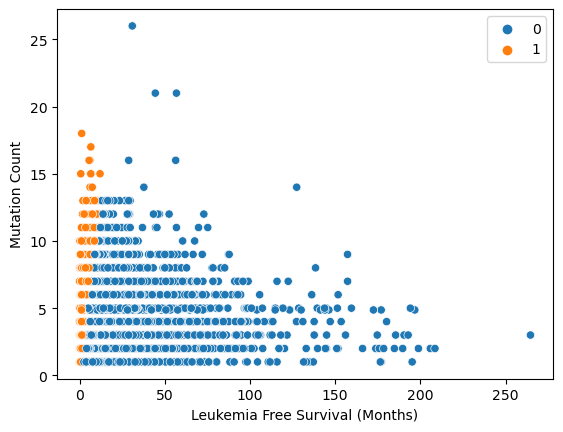

In [26]:
sns.scatterplot(data = X_train, y = 'Mutation Count', x = 'Leukemia Free Survival (Months)', hue = fits_dp[0].labels_)

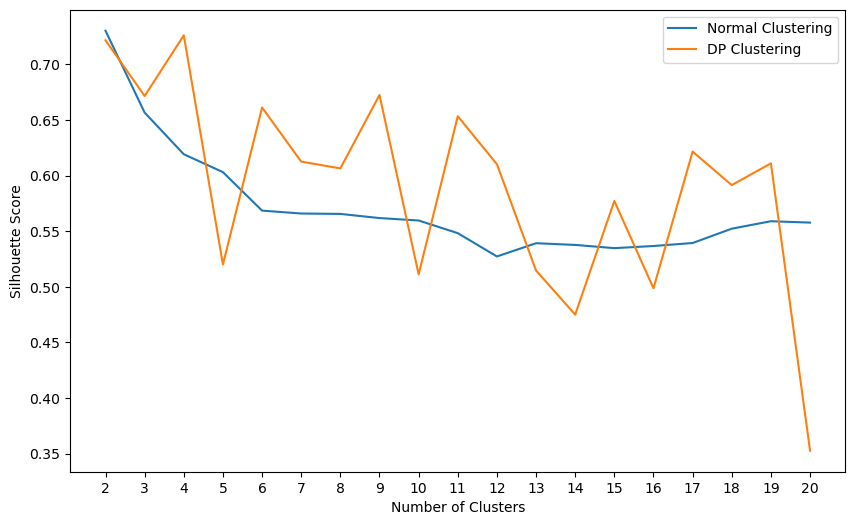

In [27]:
#plot 2d graph with the silouhette score in score and in score_dp for the different values of k

import matplotlib.pyplot as plt

# Number of clusters
num_clusters = list(range(2, 21))

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Plot silhouette scores
plt.plot(num_clusters, score, label='Normal Clustering')
plt.plot(num_clusters, score_dp, label='DP Clustering')

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(num_clusters)  # Set x-axis ticks to match the number of clusters
plt.legend(loc = 'best')
plt.show()



## Statistical Data Querying

In [28]:
import pydp as dp
from pydp.algorithms.laplacian import BoundedMean, BoundedStandardDeviation, BoundedVariance, Count

In [29]:
# prepare data
#df[['Hemoglobin (g/dL)', 'Overall Survival (Months)', 'Mutation Count']]

Hemoglobin = list(df['Hemoglobin (g/dL)'])
Hemoglobin = [x for x in Hemoglobin if str(x) != 'nan']

Survival = list(df['Overall Survival (Months)'])
Survival = [x for x in Survival if str(x) != 'nan']

Mutation = list(df['Mutation Count'])
Mutation = [x for x in Mutation if str(x) != 'nan']

list_of_lists = [Hemoglobin, Survival, Mutation]

df[['Hemoglobin (g/dL)', 'Overall Survival (Months)', 'Mutation Count']]

,Hemoglobin (g/dL),Overall Survival (Months),Mutation Count
0,8.8,69.830137,11.0
1,9.8,34.290411,3.0
2,8.9,3.682192,3.0
3,7.0,62.235616,2.0
4,11.8,67.758904,3.0
...,...,...,...
3318,11.5,51.484932,6.0
3319,11.2,27.353425,2.0
3320,11.3,6.936986,3.0
3321,8.2,15.419178,6.0


### DP Mean

In [30]:
# Mean
print('-------------------')
print('Mean')
print('-------------------')
def mean(list_samples):
    return np.mean(list_samples)

# Results
print("Hemoglobin mean: %.2f" % mean(Hemoglobin))
print("Survival mean: %.2f" % mean(Survival))
print("Mutation mean: %.2f" % mean(Mutation))

# DP Mean
print('-------------------')
print('-------------------')
print('DP Mean')
print('-------------------')
def dp_mean(epsilon, list_samples, delta=1e-5, lower_bound=0, upper_bound=100):
    b_mean = BoundedMean(epsilon=epsilon, delta=delta, lower_bound=lower_bound, upper_bound=upper_bound, dtype="float")
    return b_mean.quick_result(list_samples)

# Results
print("Hemoglobin mean: %.2f" % dp_mean(0.5, Hemoglobin))
print("Survival mean: %.2f" % dp_mean(0.5, Survival))
print("Mutation mean: %.2f" % dp_mean(0.5, Mutation))

-------------------
Mean
-------------------
Hemoglobin mean: 9.86
Survival mean: 29.77
Mutation mean: 4.87
-------------------
-------------------
DP Mean
-------------------
Hemoglobin mean: 9.70
Survival mean: 28.42
Mutation mean: 5.02


### DP Variance

In [31]:
# Variance
print('-------------------')
print('Variance')
print('-------------------')
def variance(list_samples):
    return np.var(list_samples)

#Results
print("Hemoglobin variance: %.2f" % variance(Hemoglobin))
print("Survival variance: %.2f" % variance(Survival))
print("Mutation variance: %.2f" % variance(Mutation))

# DP Variance
print('-------------------')
print('-------------------')
print('DP Variance')
print('-------------------')
def dp_variance(epsilon, list_samples, delta=1e-5, lower_bound=0, upper_bound=100):
    b_variance = BoundedVariance(epsilon = epsilon, delta = delta, lower_bound=lower_bound, upper_bound=upper_bound, dtype='float')
    return b_variance.quick_result(list_samples)

#Results
print("Hemoglobin variance: %.2f" % dp_variance(0.5, Hemoglobin))
print("Survival variance: %.2f" % dp_variance(0.5, Survival))
print("Mutation variance: %.2f" % dp_variance(0.5, Mutation))

-------------------
Variance
-------------------
Hemoglobin variance: 4.13
Survival variance: 964.36
Mutation variance: 7.31
-------------------
-------------------
DP Variance
-------------------
Hemoglobin variance: 5.90
Survival variance: 676.27
Mutation variance: 2.94


### DP Standard Deviation

In [32]:
# Standard deviation
print('-------------------')
print('Standard Deviation')
print('-------------------')
def stdev(list_samples):
    return np.std(list_samples)

#Results
print("Hemoglobin Standard Deviation: %.2f" % stdev(Hemoglobin))
print("Survival Standard Deviation: %.2f" % stdev(Survival))
print("Mutation Standard Deviation: %.2f" % stdev(Mutation))

# DP Variance
print('-------------------')
print('-------------------')
print('DP Standard Deviation')
print('-------------------')
def dp_stdev(epsilon, list_samples, delta=1e-5, lower_bound=0, upper_bound=100):
    b_stdev = BoundedStandardDeviation(epsilon = epsilon, delta = delta, lower_bound=lower_bound, upper_bound=upper_bound, dtype='float')
    return b_stdev.quick_result(list_samples)

#Results
print("Hemoglobin Standard Deviation: %.2f" % dp_stdev(0.5, Hemoglobin))
print("Survival Standard Deviation: %.2f" % dp_stdev(0.5, Survival))
print("Mutation Standard Deviation: %.2f" % dp_stdev(0.5, Mutation))

-------------------
Standard Deviation
-------------------
Hemoglobin Standard Deviation: 2.03
Survival Standard Deviation: 31.05
Mutation Standard Deviation: 2.70
-------------------
-------------------
DP Standard Deviation
-------------------
Hemoglobin Standard Deviation: 2.53
Survival Standard Deviation: 25.56
Mutation Standard Deviation: 1.12


### DP Count Queryes

In [33]:
# Standard deviation
print('-------------------')
print('Count Query')
print('-------------------')
def count_query_above(x, limit):
    return len([i for i in x if i > limit])
    

#Results
print("Hemoglobin above 10: %.d of %d" % (count_query_above(Hemoglobin, 10), len(Hemoglobin)))
print("Survival above 10: %.d of %d" % (count_query_above(Survival, 10), len(Survival)))
print("Mutation above 10: %.d of %d" % (count_query_above(Mutation, 10), len(Mutation)))

# DP Variance
print('-------------------')
print('-------------------')
print('DP Count Query')
print('-------------------')
def dp_count_above(epsilon, list_samples, limit, delta=1e-5, lower_bound=0, upper_bound=100):
    dp_count = Count(epsilon=epsilon, dtype='float')
    return dp_count.quick_result([i for i in list_samples if i > limit])
#Results
print("DP Hemoglobin above 10: %.d of %d" % (dp_count_above(0.5, Hemoglobin, 10), len(Hemoglobin)))
print("DP Survival above 10: %.d of %d" % (dp_count_above(0.5, Survival, 10), len(Survival)))
print("DP Mutation above 10: %.d of %d" % (dp_count_above(0.5, Mutation, 10), len(Mutation)))

-------------------
Count Query
-------------------
Hemoglobin above 10: 1289 of 3098
Survival above 10: 2219 of 3173
Mutation above 10: 116 of 3094
-------------------
-------------------
DP Count Query
-------------------
DP Hemoglobin above 10: 1287 of 3098
DP Survival above 10: 2221 of 3173
DP Mutation above 10: 115 of 3094


### Data Preparation for Histogram Querying

In [34]:
age_patients = df[['Age in years ']]
age_patients = age_patients.dropna()
age_patients = age_patients.astype(int)

### Normal Histograms

In [35]:
#get the bins for the histogram, the bins are the same as the unique values of the age_patients
bins = np.unique(age_patients)

#calculate the histogram
hist, _ = np.histogram(age_patients, bins=bins)
hist = hist / np.sum(hist)

print("Histograms values (Real): \n", hist, "\n")
print("Bins: \n", bins, "\n")

Histograms values (Real): 
 [0.00031556 0.00031556 0.00031556 0.00063111 0.00063111 0.00031556
 0.00157778 0.00031556 0.00031556 0.00063111 0.00063111 0.00094667
 0.00063111 0.00094667 0.00094667 0.00189334 0.00126223 0.00126223
 0.00189334 0.0022089  0.00157778 0.0022089  0.00284001 0.00284001
 0.00252446 0.00189334 0.00315557 0.00347113 0.00504891 0.00504891
 0.0044178  0.0044178  0.00631114 0.0044178  0.00757337 0.00852004
 0.00599558 0.00915115 0.01136005 0.00883559 0.01577785 0.0160934
 0.02082676 0.01577785 0.0205112  0.0160934  0.02335121 0.02650678
 0.02650678 0.02208899 0.03313348 0.03187125 0.03313348 0.03376459
 0.03250237 0.03565794 0.03723572 0.03849795 0.04228463 0.03976018
 0.03692016 0.03660461 0.03565794 0.0315557  0.03092458 0.03187125
 0.02682234 0.02114232 0.01798675 0.01293784 0.01230672 0.00725781
 0.00410224 0.0022089  0.00284001 0.00347113 0.00189334 0.00031556
 0.00063111 0.00031556 0.00031556 0.00031556 0.00063111] 

Bins: 
 [ 12  16  18  19  21  22  23  24  2

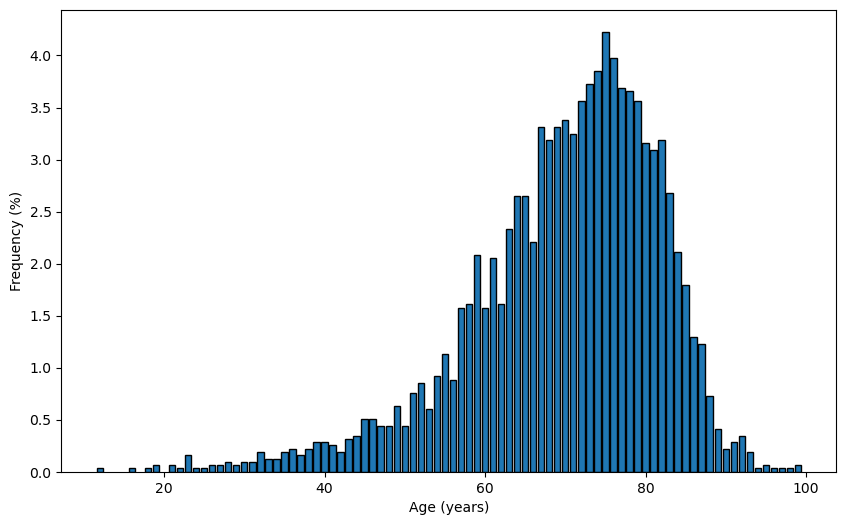

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], hist*100, edgecolor='black')
plt.xlabel('Age (years)')
plt.ylabel('Frequency (%)')
plt.show()

### DP Histograms

In [37]:
from diffprivlib import tools as dp

bins = np.unique(age_patients)

dp_hist, dp_bins = dp.histogram(age_patients, epsilon=0.1, random_state=0, bins=bins, range=(0, 100))
dp_hist = dp_hist / dp_hist.sum()

print("Histograms values (DP altered): \n", dp_hist, "\n")
print("Bins: \n", dp_bins, "\n")
print("Sum of histogram values: \n", dp_hist.sum())

Histograms values (DP altered): 
 [0.00730149 0.00273806 0.00517189 0.00790995 0.         0.00395497
 0.         0.00091269 0.00060846 0.         0.0021296  0.00943109
 0.00669303 0.00152114 0.00030423 0.00121692 0.00121692 0.00243383
 0.00365075 0.00304229 0.00152114 0.00365075 0.         0.00456343
 0.00152114 0.00578035 0.0021296  0.00365075 0.01429875 0.
 0.00182537 0.00608458 0.         0.01034378 0.00730149 0.01247338
 0.01034378 0.01338607 0.01125646 0.01156069 0.01125646 0.00912686
 0.02281716 0.01490721 0.02312139 0.01886218 0.02099179 0.02464253
 0.02251293 0.01734104 0.0380286  0.0243383  0.03194402 0.03194402
 0.02981442 0.03316094 0.03954974 0.03498631 0.03255248 0.03620322
 0.03437785 0.03468208 0.0380286  0.02951019 0.02829328 0.02677213
 0.02707636 0.01977487 0.01855796 0.01186492 0.01186492 0.
 0.00395497 0.00699726 0.00486766 0.00304229 0.         0.
 0.         0.         0.         0.         0.00030423] 

Bins: 
 [ 12  16  18  19  21  22  23  24  25  26  27  28  29

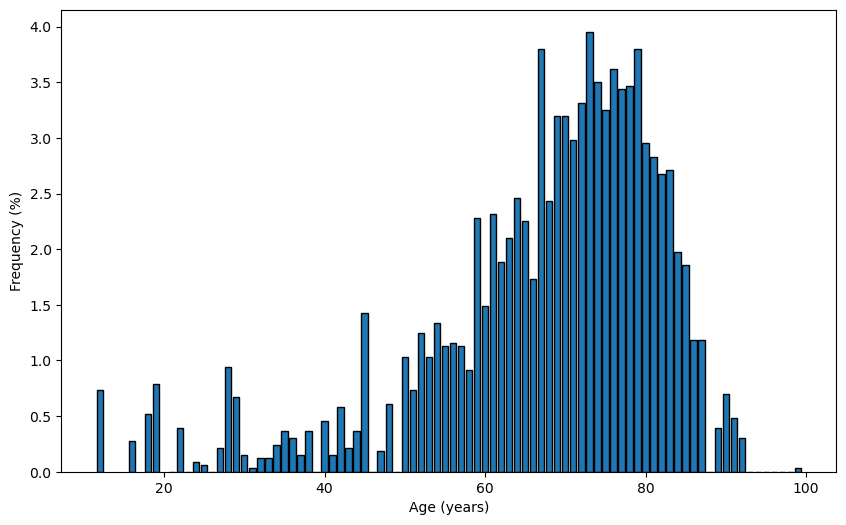

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(dp_bins[:-1], dp_hist*100, edgecolor="black")
plt.xlabel("Age (years)")
plt.ylabel("Frequency (%)")
plt.show()

### Results and Conclusions

In [39]:
print("Total histogram error (epsilon=0.1): %.2f%%" % (np.abs(hist - dp_hist).sum()*100))

Total histogram error (epsilon=0.1): 22.08%


In [40]:
bins = np.unique(age_patients)

dp_hist, dp_bins = dp.histogram(age_patients, epsilon=1, random_state=0, bins=bins, range=(0, 100))
dp_hist = dp_hist / dp_hist.sum()

print("Histpgrams values: \n", dp_hist, "\n")
print("Bins: \n", dp_bins, "\n")
print("Verify: %.1f" % dp_hist.sum())

Histpgrams values: 
 [0.00094697 0.00063131 0.00063131 0.00126263 0.         0.00063131
 0.00094697 0.00031566 0.00031566 0.00031566 0.00063131 0.00189394
 0.00126263 0.00094697 0.00094697 0.00189394 0.00126263 0.00126263
 0.00189394 0.0022096  0.00157828 0.0022096  0.0022096  0.00284091
 0.00252525 0.0022096  0.00315657 0.00347222 0.00599747 0.00441919
 0.00410354 0.00441919 0.00568182 0.00505051 0.00757576 0.00883838
 0.00631313 0.0094697  0.01136364 0.00915404 0.01546717 0.01546717
 0.02114899 0.01578283 0.02083333 0.01641414 0.02335859 0.02651515
 0.02619949 0.0217803  0.03377525 0.03125    0.03314394 0.03377525
 0.03251263 0.03566919 0.03756313 0.03819444 0.04135101 0.03945707
 0.03693182 0.03661616 0.03598485 0.03156566 0.03093434 0.03156566
 0.02683081 0.02114899 0.01799242 0.01294192 0.01231061 0.00631313
 0.00410354 0.00252525 0.00315657 0.00347222 0.00157828 0.00031566
 0.00031566 0.00031566 0.         0.         0.00063131] 

Bins: 
 [ 12  16  18  19  21  22  23  24  25  26 

In [41]:
print("Total histogram error (epsilon=1): %.2f%%" % (np.abs(hist - dp_hist).sum()*100))

Total histogram error (epsilon=1): 2.00%


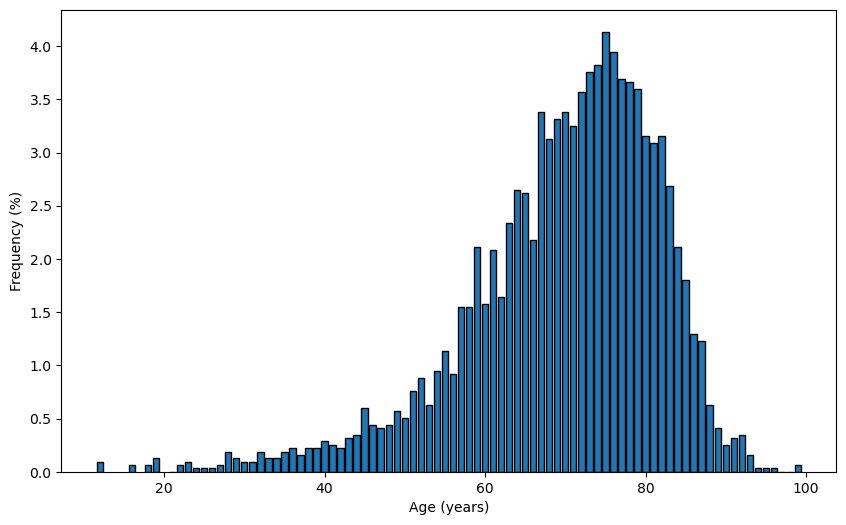

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(dp_bins[:-1], dp_hist*100, edgecolor="black")
plt.xlabel("Age (years)")
plt.ylabel("Frequency (%)")
plt.show()

In [43]:
errors = []
epsilons = np.arange(0.1, 10, 0.1)
# try every epsilon in the interval 0.1 to 10 with a step of 0.1
for epsilon in epsilons:
    bins = np.unique(age_patients)
    dp_hist, dp_bins = dp.histogram(age_patients, epsilon=epsilon, bins=bins, range=(0, 100))
    dp_hist = dp_hist / dp_hist.sum()
    errors.append(np.abs(dp_hist - hist).sum()*100)

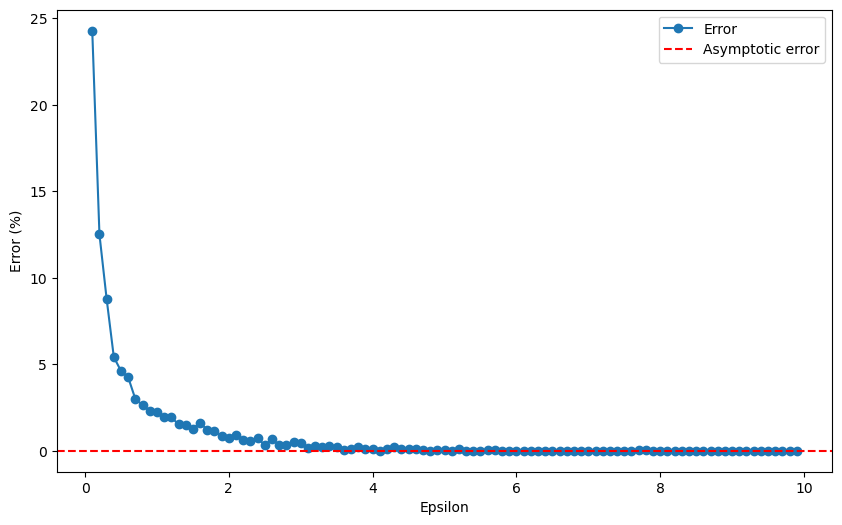

In [44]:
# plot 2d graph, x = epsilons, y = errors

plt.figure(figsize=(10, 6))
plt.plot(epsilons, errors, "o-")
plt.xlabel("Epsilon")
plt.ylabel("Error (%)")

#plot y = 0, aympototic error should be 0 (i.e. no differences with the original data)
plt.axhline(y=0, color='r', linestyle='--')

plt.legend(["Error", "Asymptotic error"])
plt.show()